<a href="https://colab.research.google.com/github/choi-yh/Pyhon_ML_Guide/blob/master/05_00_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01. 회귀 소개

* 갈톤(Galton): 사람의 키는 부모의 키가 크다고 무한정 커지는 것이 아니고, 부모의 키가 작다고 무한정 작아지는 것 또한 아니다. 즉, 사람의 키는 평균 키로 회귀하려는 경향을 가진다.
* **회귀분석**: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법 
* 여러 개의 독립 변수와 한 개의 종속 변수 간의 상관 관계를 모델링하는 기법


* 머신러닝에서의 회귀: 독립 변수 - 피처 / 종속 변수 - 결정 값 -> 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것

|**독립 변수 개수** | **회귀 계수의 결합** |
|-------------------|----------------------|
| 1개: 단일 회귀    | 선형: 선형 회귀      |
| 여러 개: 다중 회귀| 비선형: 비선형 회귀  | 


* 대표적인 선형 회귀 모델
    * **일반 선형 회귀**: 예측 값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)을 적용하지 않은 모델
    * **릿지(Ridge)**: 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델  
        L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수 값을 더 작게 만드는 규제 모델
    * **라쏘(Lasso)**: 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식  
        L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것  
        L1 규제는 피처 선택 기능으로도 불림
    * **엘라스틱넷(ElasticNet)**: L2, L1 규제를 함께 결합한 모델  
        주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정
    * **로지스틱 회귀(Logistic Regression)**: 회귀라는 이름이 붙어있지만, 분류에 사용되는 선형 모델. 매우 강력한 분류 알고리즘  
        이진 분류 뿐만 아니라 희소 영역의 분류 (ex. 텍스트 분류)의 영역에서 뛰어난 예측 성능을 보인다.

## 02. 단순 선형 회귀를 통한 회귀 이해

* **단순 선형 회귀**: 독립 변수도 하나, 종속 변수도 하나인 선형 회귀
* **잔차**: 실제 값과 회귀 모델의 차이에 따른 오류 값
    * 최적의 회귀 모델을 만든다. <=> 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다.
    * 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다.
* 오류 합 계산
    * 오류 값에는 +,- 값이 존재하기 때문에 단순히 더할 경우 의미가 없다.
    * Mean Absolute Error: 절댓값을 취해서 더하기
    * Residual Sum of Square(RSS): 오류 값의 제곱을 구해서 더하기

$$ RSS(w_0, w_1) = \frac{1}{N} \sum_{i=1}^N (y_i - (w_0 + w_1 * x_i))^2 $$
$$ i\text{는 1부터 학습 데이터의 총 건수} N \text{까지} $$

* RSS는 비용(Cost)이며, w 변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 한다.

## 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

* W 파라미터를 계산할 때, 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 방식

* $ R(w) = \frac{1}{N} \sum_{i=1}^N (y_i - (w_0 + w_1*x_i))^2 $ 를 미분해서 최솟값을 구하는데 $w_0$과 $w_1$을 가지고 있기 때문에 편미분을 적용

$$ {\partial R(w) \over \partial w_1} = \frac{2}{N} \sum_{i=1}^N - x_t * (y_i - (w_0 + w_1x_i) = -\frac{2}{N} \sum_{i=1}^N x_i * (\text{실제값}_i - \text{예측값}_i) $$
$$ {\partial R(w) \over \partial w_0} = \frac{2}{N} \sum_{i=1}^N - (y_i - (w_0 + w_1x_i) = -\frac{2}{N} \sum_{i=1}^N 
(\text{실제값}_i - \text{예측값}_i) $$

* 편미분 값 보정을 위해 $\eta$를 곱하는데 이를 *학습률(learning rate)* 이라고 한다.

* **경사 하강법의 일반적인 프로세스**
    1. $w_1, w_0$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
    2. $ w_1 = w_1 + \eta \frac{2}{N} \sum_{i=1}^N x_i * (\text{실제값}_i - \text{예측값}_i) $  
$ w_0 = w_0 + \eta \frac{2}{N} \sum_{i=1}^N x_i * (\text{실제값}_i - \text{예측값}_i) $  
    로 업데이트한 후 다시 비용 함수의 값을 계산
    3. 비용 함수의 값이 감소했으면 다시 2를 반복. 더 이상 비용 함수의 값이 감소하지 않으면 그 때의 $w_1, w_0$를 구하고 반복을 중지

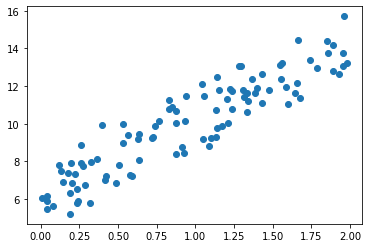

In [2]:
# 경사 하강법 파이썬 구현
# y = 4x + 6을 근사하기 위한 100개의 데이터 세트를 만들고 경사 하강법을 통해 w_1, w_0 도출

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4x + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4*X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)
plt.show()

In [3]:
# 비용 함수 설정
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [ ]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)